Importing Libraries
1. For data loading and extraction
2. For labeling and normalizing values of data
3. For model creation
4. For Summary plotting

In [4]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import plotly.express as px
from sklearn.metrics import classification_report, confusion_matrix

Function to load images
For a specific dataset structure, here folders consisting of images, inside a folder

In [6]:
def load_image_dataset(base_path, image_size=(224, 224), max_images_per_class=1000):
    classes = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
    
    images = []  # Images
    labels = []  # Labels
    
    for class_index, class_name in enumerate(tqdm(classes, desc="Processing classes")):
        class_path = os.path.join(base_path, class_name)
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for image_file in tqdm(image_files[:max_images_per_class], desc=f"Loading {class_name}", leave=False):
            image_path = os.path.join(class_path, image_file)
            try:
                with Image.open(image_path) as img:
                    img = img.convert('RGB')  # Ensure image is in RGB format
                    img = img.resize(image_size)  # Resize image
                    img_array = np.array(img) / 255.0  # Normalize pixel values
                    images.append(img_array)
                    labels.append(class_index)
            except Exception as e:
                print(f"Error processing {image_path}: {e}")
    
    return np.array(images), np.array(labels), classes

In [7]:
# loading images
base_path = r"D:\Vadodara Hackathon 5.0\dataset\English-ISL Dataset\data"  # Adjust if your dataset is stored elsewhere
image_size = (64, 64)  # Adjust based on your CNN's input size
max_images_per_class = 100  # Adjust if needed

images, labels, classes = load_image_dataset(base_path, image_size, max_images_per_class)

print(f"Loaded {len(images)} images from {len(classes)} classes")
print(f"Image shape: {images.shape[1:]}")
print(f"Classes: {classes}")

# Convert to TensorFlow Dataset (optional)
# dataset = tf.data.Dataset.from_tensor_slices((X, y))
# dataset = dataset.shuffle(buffer_size=len(X)).batch(32)

print(" Arrays for 'Normalized Images' and 'un-encoded Labels' created successfully!")


Processing classes: 100%|██████████████████████████████████████████████████████████████| 35/35 [01:05<00:00,  1.88s/it]


Loaded 3500 images from 35 classes
Image shape: (64, 64, 3)
Classes: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
 Arrays for 'Normalized Images' and 'un-encoded Labels' created successfully!


In [8]:
#Label encoding in binary format
lb = LabelBinarizer()
binr_labels = lb.fit_transform(labels)


In [9]:
# Split data into training and test sets
inp_train, inp_test, val_train, val_test = train_test_split(images, binr_labels, test_size=0.2, random_state=41)

In [10]:
# Data Augmentation
augm_data = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.20,
    height_shift_range = 0.20,
    shear_range = 0.15,
    horizontal_flip = True,
    fill_mode = "nearest"
)
augm_data.fit(inp_train)

In [11]:
#model creation
seq_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

seq_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\agarw\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Training the model
history = seq_model.fit(augm_data.flow(inp_train, val_train, batch_size=32), validation_data=(inp_test, val_test), epochs=20)

Epoch 1/20


C:\Users\agarw\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 204ms/step - accuracy: 0.0602 - loss: 3.3929 - val_accuracy: 0.5843 - val_loss: 1.5933
Epoch 2/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 17s 185ms/step - accuracy: 0.3440 - loss: 2.1553 - val_accuracy: 0.8314 - val_loss: 0.5648
Epoch 3/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - accuracy: 0.6662 - loss: 1.0869 - val_accuracy: 0.9929 - val_loss: 0.0747
Epoch 4/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.7855 - loss: 0.6198 - val_accuracy: 0.9986 - val_loss: 0.0220
Epoch 5/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 249ms/step - accuracy: 0.8597 - loss: 0.4367 - val_accuracy: 0.9971 - val_loss: 0.0126
Epoch 6/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - accuracy: 0.9097 - loss: 0.2930 - val_accuracy: 0.9971 - val_loss: 0.0267
Epoch 7/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.9265 - loss: 0.2309 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 8/20
88/88 ━━━━━━━━━━━━━━━━━━━━ 22s 242ms/step - accuracy: 0.9262 - loss: 0.1997 - val_accuracy: 1.000

In [42]:
# Evaluate the model

val_pred = seq_model.predict(inp_test)
val_test_labels = lb.inverse_transform(val_test)
val_pred_labels = lb.inverse_transform(val_pred)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [44]:
print(val_pred_labels)
print(val_test_labels)

[ 7 33 17  6 14 28 30  8 24 28 23 32 18 25 17 30 30  9 22 16 27 30 22 25
 17  7  9 28  1  6 20  7  9 25  8  1  6  3 13 10 13 33 15 17 17 10 21  2
 30  7 14 17 16 12 15 16 24 13  3 14 19 27 13 20 21 29  8 16 26 20  0 23
 30  7 19 27 34 26 22  4 13  6 34 27 13 26 23  3 34 28 26 10 15  3 25  4
 11 32  6 23  7  4  2 23 32 19 11 11 31 33 28 30 11  0 33 30 19  5 19 26
 28 25  5 33  0 12 10 10  1 13  5 10 21 26 24  6  0 24 12 33 22 16 13 23
 23  8  2 15 17 17 31 23  4 31 10 29  5 26 20  6 25 22  4 22  2  3  3 23
  1  0  1 20 10  2 22  8 21 13 14 20  3 21 23  8 26 34 28 13 20 14 28  7
 10 21 18 15 12 25  7  5 28  5 29 22 27 13 31 25  7 15  3 11 15 30 25 24
 31  2 15 30 23 29 29 10 23 14  7  4  1 28  6 14  0 13 17 31  6 15 18  0
  7 12  0 24  3 19 26 31  1 16  0 22 25 23 11 10 30 12  5  8 19  5  6  8
 29  5 31 33  3 15 10 25  7  1 30 20 21 20 20 15 25 14  2 10 22  4 30 34
  3 11 11 34 27 26 23  2 27 10  2 20  0 32 26  1  9 11 24  4 34 21  0 31
 13 29 18 18 32 33 14 25 16 22  4 28 15  9 14  0  5

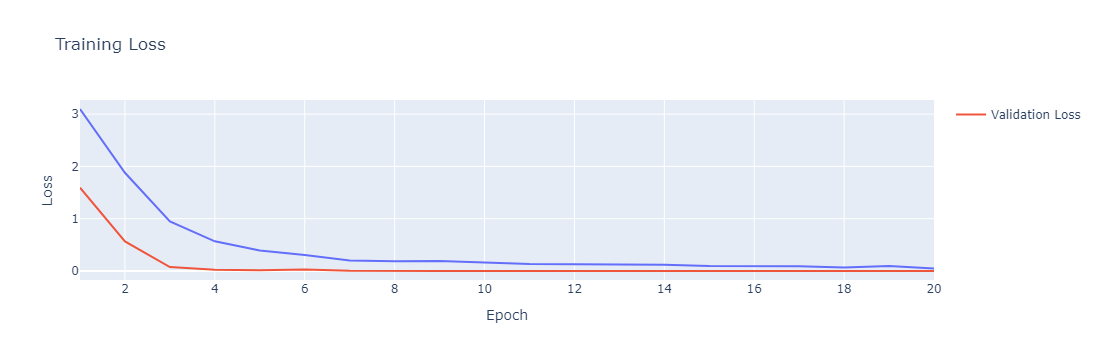

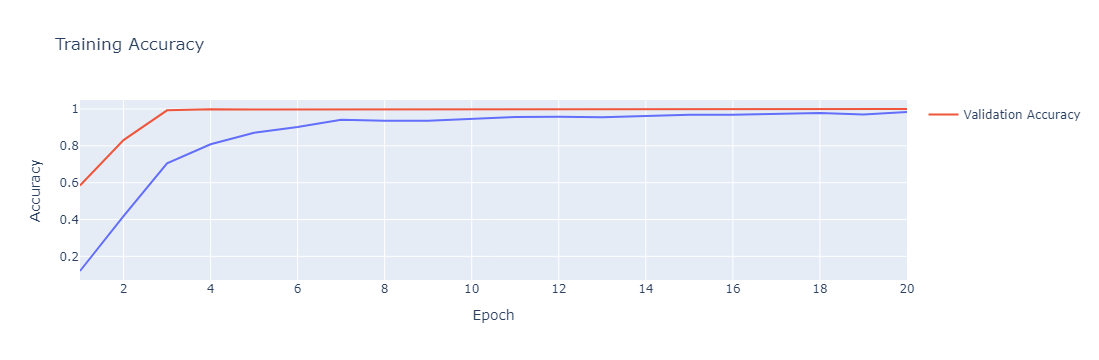

In [46]:
# Check accuracy
epochs = list(range(1, len(history.history['loss']) + 1))

fig_loss = px.line(x=epochs, y=history.history['loss'], labels={'x': 'Epoch', 'y': 'Loss'}, title='Training Loss')
fig_loss.add_scatter(x=epochs, y=history.history['val_loss'], mode='lines', name='Validation Loss')
fig_loss.show()

fig_acc = px.line(x=epochs, y=history.history['accuracy'], labels={'x': 'Epoch', 'y': 'Accuracy'}, title='Training Accuracy')
fig_acc.add_scatter(x=epochs, y=history.history['val_accuracy'], mode='lines', name='Validation Accuracy')
fig_acc.show()

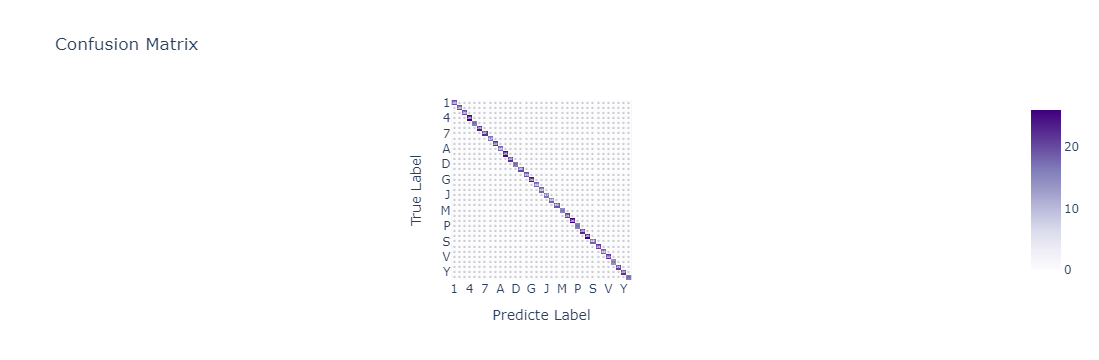

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        18
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        18
          17       1.00    

In [84]:
#Confusion Matrix
cm = confusion_matrix(val_test_labels, val_pred_labels)

# Plot confusion matrix with annotations
fig_cm = px.imshow(cm, x=classes, y=classes, title='Confusion Matrix', color_continuous_scale='purples', text_auto=True)
fig_cm.update_layout(xaxis_title='Predicte Label', yaxis_title='True Label')
fig_cm.show()

print(classification_report(val_test_labels, val_pred_labels))

In [86]:
# Check for overfitting by comparing training and validation loss/accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

if val_loss[-1] > train_loss[-1] and val_acc[-1] < train_acc[-1]:
    print("The model might be overfitting. Consider using regularization techniques or early stopping.")
else:
    print("The model does not seem to be overfitting.")
    

The model does not seem to be overfitting.
